In [7]:
import json
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm import tqdm

In [8]:
TRAIN_FNAME = "../data/cmv_triples_train.json"
VALID_FNAME = "../data/cmv_triples_valid.json"

nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "ner"])

with open(TRAIN_FNAME) as train_file:
    train_json = json.load(train_file)
with open(VALID_FNAME) as valid_file:
    valid_json = json.load(valid_file)
    
all_json = train_json + valid_json
all_data = []
for sub in tqdm(all_json):
    all_data.append({key: nlp(sub[key]) for key in sub})

lengths = [(len(inst["op_selftext"]), len(inst["deltaed_comment"]), len(inst["explanation"])) 
           for inst in all_data]
length_df = pd.DataFrame(lengths, columns=["OP", "PC", "EX"])

100%|██████████| 34902/34902 [02:18<00:00, 252.84it/s]


## Heatmap

In [9]:
sample = length_df.sample(5000, random_state=1)
x = np.array(sample["EX"])
y = np.array(sample["PC"])

corrs = np.corrcoef([sample["EX"], sample["PC"], sample["OP"]])
# columns: ex, pc, op
corrs

array([[1.        , 0.32595671, 0.2641234 ],
       [0.32595671, 1.        , 0.10413845],
       [0.2641234 , 0.10413845, 1.        ]])

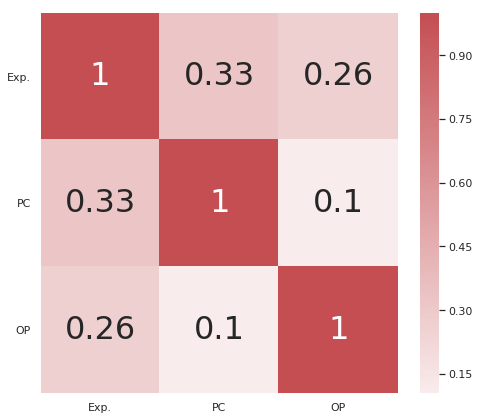

In [10]:
plt.rcParams["axes.labelsize"] = 65
plt.rcParams['text.usetex'] = False
plt.rcParams["font.size"] = 32

text_types = ["Exp.", "PC", "OP"]
annot_kws={"size": 20}

mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,7))


# #F04444
# c44240
pal = sns.light_palette((0.7686274509803922, 0.3058823529411765, 0.3215686274509804), as_cmap=True)

ax = sns.heatmap(corrs, ax=ax, yticklabels=text_types, xticklabels=text_types, annot=True, cmap=pal)
plt.yticks(rotation=0)

fig.savefig("../records/plots/lengths_heatmap.png", bbox_inches="tight")